In [78]:
import pandas as pd
import numpy as np

fd = pd.read_csv("data.csv", parse_dates=[0])
print(fd.info())
print(fd.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                450017 non-null  datetime64[ns]
 1   UNIQUE_CARRIER         450017 non-null  object        
 2   AIRLINE_ID             450017 non-null  int64         
 3   TAIL_NUM               449378 non-null  object        
 4   FL_NUM                 450017 non-null  int64         
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64         
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64         
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64         
 8   ORIGIN                 450017 non-null  object        
 9   ORIGIN_CITY_NAME       450017 non-null  object        
 10  DEST_AIRPORT_ID        450017 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64         
 12  DEST_CITY_MARKET_ID    450017 non-null  int6

In [79]:
#fd = fd.drop("Unnamed: 32", axis=1)

print(len(fd["UNIQUE_CARRIER"].unique()))
d_air = fd["DEST"].unique()
o_air = fd["ORIGIN"].unique()
print(len(np.intersect1d(d_air, o_air)))
print(f"INTERVAL: from {fd['FL_DATE'].min()} to {fd['FL_DATE'].max()}")

12
297
INTERVAL: from 2017-01-01 00:00:00 to 2017-01-31 00:00:00


In [80]:
fd = fd[fd["CANCELLED"]==0]
fd.head()


,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",...,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",...,1809.0,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",...,2040.0,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",...,1749.0,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,642.0,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0,NaN


In [81]:
fd.groupby(by="UNIQUE_CARRIER").size()

UNIQUE_CARRIER
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
dtype: int64

In [82]:
fd.pivot_table(index="UNIQUE_CARRIER", values=["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"], aggfunc=np.mean)

,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,NAS_DELAY,SECURITY_DELAY,WEATHER_DELAY
UNIQUE_CARRIER,,,,,
AA,18.736410,18.742267,15.370026,0.178156,2.352168
AS,11.736505,19.189946,18.615047,0.169028,3.820850
B6,20.297641,29.282627,15.223725,0.312820,1.436562
DL,30.858959,21.964020,16.836252,0.033901,9.572160
EV,36.329407,31.725109,15.794439,0.000000,1.368504
F9,16.748299,31.091610,19.070295,0.000000,0.870295
HA,29.941714,14.113143,0.251429,0.122286,0.897143
NK,9.080825,12.137978,43.840041,0.035171,0.732499
OO,23.495640,31.316244,15.186582,0.100759,4.633053


        ARR_DELAY  weekday
0            27.0        6
1            42.0        6
2            42.0        6
3            97.0        6
4            42.0        6
...           ...      ...
450012       62.0        1
450013      -13.0        1
450014       -7.0        1
450015      -20.0        1
450016      -12.0        1

[441131 rows x 2 columns]
           ARR_DELAY   weekday
ARR_DELAY   1.000000  0.022545
weekday     0.022545  1.000000


<AxesSubplot: >

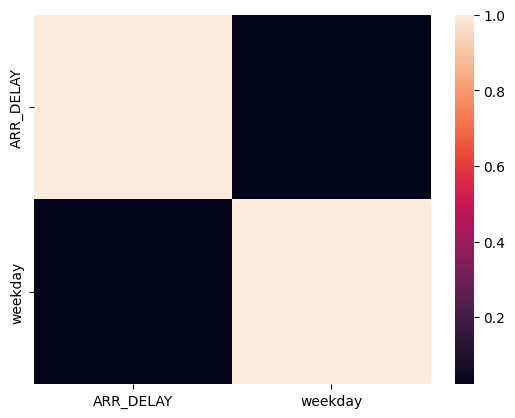

In [83]:
fd=fd.assign(weekday=lambda x: x["FL_DATE"].dt.day_of_week)
#print(fd[["FL_DATE", "weekday"]])


fd=fd.assign(delaydelta=lambda x: x["ARR_DELAY"]-x["DEP_DELAY"])
#print(fd[["DEP_DELAY", "ARR_DELAY", "delaydelta"]])

arr_delay = fd["ARR_DELAY"]
dow = fd["weekday"]

import seaborn as sns
delay_dow = pd.concat([arr_delay, dow], axis=1)
print(delay_dow)
delay_dow_corr = delay_dow.corr()
print(delay_dow_corr)

sns.heatmap(delay_dow_corr)



In [84]:
weekend_fd = fd[fd["weekday"]>=5][["UNIQUE_CARRIER", "ARR_DELAY"]]
normaldays_fd = fd[fd["weekday"]<5][["UNIQUE_CARRIER", "ARR_DELAY"]]

weekend_fd = weekend_fd.groupby(by="UNIQUE_CARRIER").mean()
normaldays_fd = normaldays_fd.groupby(by="UNIQUE_CARRIER").mean()

                ARR_DELAY_weekend  ARR_DELAY_week
UNIQUE_CARRIER                                   
AA                       6.298535        2.214675
AS                       6.016572        2.254182
B6                      16.044561        5.609369
DL                      23.363615       -1.840765
EV                      17.592522       11.817625
F9                       8.118907       13.690379
HA                       5.410840        2.866092
NK                      10.667156        8.338504
OO                       9.654595       13.511521
UA                       6.895549        4.252543
VX                      15.094556       15.723634
WN                       6.493232        6.858769


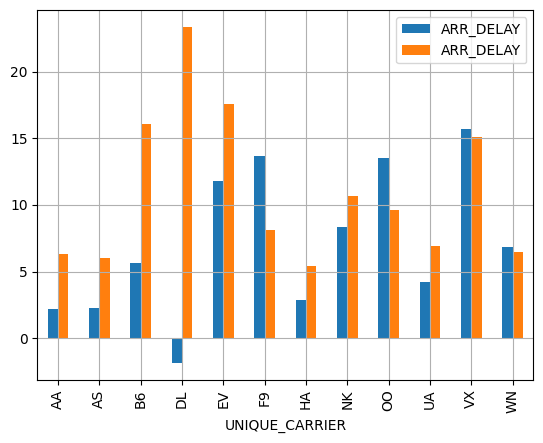

In [85]:
new_df = weekend_fd.merge(normaldays_fd, on="UNIQUE_CARRIER").rename(columns={'ARR_DELAY_x': 'ARR_DELAY_weekend', 'ARR_DELAY_y': 'ARR_DELAY_week'})
print(new_df)
weekend_fd.name="weekend delay"
normaldays_fd.name="working days delay"
ax = pd.concat([normaldays_fd, weekend_fd], axis=1).plot.bar()
ax.grid(True)


In [86]:
multi_df = fd.set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE']).sort_index()
multi_df.head()


AIRLINE_ID TAIL_NUM  FL_NUM  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                   
AA             ABQ    DFW  2017-01-01       19805   N4XSAA    1282   
                           2017-01-01       19805   N3NRAA    2611   
                           2017-01-01       19805   N4WNAA    2402   
                           2017-01-02       19805   N4XKAA    2611   
                           2017-01-02       19805   N4XBAA    2402   

                                       ORIGIN_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                         
AA             ABQ    DFW  2017-01-01              10140   
                           2017-01-01              10140   
                           2017-01-01              10140   
                           2017-01-02              10140   
                           2017-01-02              10140   

                                       ORIGIN_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             ABQ    DFW  2017-01-01                1014003   
                           2017-01-01                1014003   
                           2017-01-01                1014003   
                           2017-01-02                1014003   
                           2017-01-02                1014003   

                                       ORIGIN_CITY_MARKET_ID ORIGIN_CITY_NAME  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                              
AA             ABQ    DFW  2017-01-01                  30140  Albuquerque, NM   
                           2017-01-01                  30140  Albuquerque, NM   
                           2017-01-01                  30140  Albuquerque, NM   
                           2017-01-02                  30140  Albuquerque, NM   
                           2017-01-02                  30140  Albuquerque, NM   

                                       DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                            
AA             ABQ    DFW  2017-01-01            11298              1129804   
                           2017-01-01            11298              1129804   
                           2017-01-01            11298              1129804   
                           2017-01-02            11298              1129804   
                           2017-01-02            11298              1129804   

                                       DEST_CITY_MARKET_ID  ... CANCELLED  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                          ...             
AA             ABQ    DFW  2017-01-01                30194  ...       0.0   
                           2017-01-01                30194  ...       0.0   
                           2017-01-01                30194  ...       0.0   
                           2017-01-02                30194  ...       0.0   
                           2017-01-02                30194  ...       0.0   

                                       CANCELLATION_CODE  CARRIER_DELAY  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                        
AA             ABQ    DFW  2017-01-01                NaN            NaN   
                           2017-01-01                NaN            NaN   
                           2017-01-01                NaN            0.0   
                           2017-01-02                NaN            0.0   
                           2017-01-02                NaN            2.0   

                                       WEATHER_DELAY  NAS_DELAY  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                
AA             ABQ    DFW  2017-01-01            NaN        NaN   
                           2017-01-01            NaN        NaN   
                           2017-01-01            0.0        3.0   
                           2017-01-02           69.0        5.0   
                           2017-01-02            0.0        0.0   

                    

In [87]:
multi_df.loc[(['AA', 'DL'], ['LAX']), ['DEP_TIME', 'DEP_DELAY']]

DEP_TIME  DEP_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                        
AA             LAX    ATL  2017-01-01    1051.0       16.0
                           2017-01-01    1747.0      137.0
                           2017-01-02    1548.0       18.0
                           2017-01-02    2230.0       40.0
                           2017-01-02    1055.0       20.0
...                                         ...        ...
DL             LAX    TPA  2017-01-26    1146.0        1.0
                           2017-01-27    1137.0       -3.0
                           2017-01-29    1149.0        4.0
                           2017-01-30    1142.0       -3.0
                           2017-01-31    1206.0       21.0

[5437 rows x 2 columns]

In [88]:
fw_df = multi_df.loc[(slice(None), slice(None), 'LAX', slice('2017-01-01','2017-01-08')), :]
fw_df.groupby("FL_NUM")["ARR_DELAY"].mean()

FL_NUM
1        0.000000
2       60.000000
4       11.625000
5        2.875000
7       16.750000
          ...    
6344    47.000000
6354    60.000000
6522    49.666667
6563    -8.000000
6710    10.000000
Name: ARR_DELAY, Length: 1105, dtype: float64

In [89]:
fd.pivot_table(index=["UNIQUE_CARRIER", "weekday"], values="FL_NUM", aggfunc="count")

FL_NUM
UNIQUE_CARRIER weekday        
AA             0         12035
               1         11457
               2          9651
               3          9854
               4          9820
...                        ...
WN             2         14260
               3         14220
               4         14012
               5         11168
               6         16044

[84 rows x 1 columns]

In [90]:
cfd = fd.pivot_table(index="UNIQUE_CARRIER", columns="weekday", values="FL_NUM", aggfunc="count")

<AxesSubplot: xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

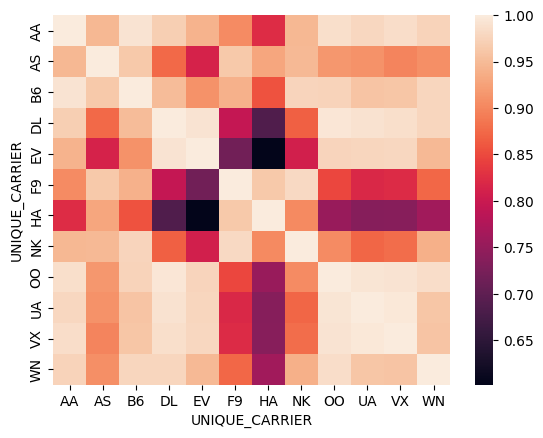

In [91]:
sns.heatmap(cfd.T.corr())

In [92]:
cwm = fd.pivot_table(index="UNIQUE_CARRIER", columns="weekday", values="ARR_DELAY", aggfunc="mean")
cwm

weekday,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,6.166653,0.899956,-0.733742,1.167107,2.849597,4.184057,7.764121
AS,1.744243,-0.795982,5.797327,4.365145,1.041602,-0.996014,11.400962
B6,12.745117,7.053235,1.656450,-0.285054,4.651251,12.001899,18.823760
DL,5.652933,-4.535590,-5.432658,-4.369801,-2.084867,23.544369,23.250943
EV,22.496612,10.791889,5.689274,8.576665,9.070754,17.576776,17.601550
F9,23.677445,13.563380,8.149744,11.303772,9.160569,3.518868,11.655117
HA,2.127660,1.141969,1.416984,1.624220,8.109954,6.437046,4.578999
NK,15.736303,7.421534,2.780186,7.838409,6.500963,6.157572,14.073158
OO,17.011347,11.123554,10.783691,15.675984,12.453080,7.208863,11.274667


<AxesSubplot: xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

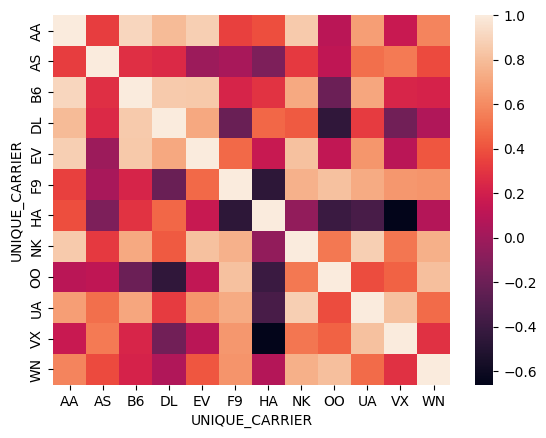

In [93]:
sns.heatmap(cwm.T.corr())

In [94]:
df13 = fd[fd["UNIQUE_CARRIER"].isin(["HA", "DL", "AA", "AS"])]
#print(df13.head())
df13_pt = df13.pivot_table(index="UNIQUE_CARRIER", columns="weekday", values="delaydelta", aggfunc="mean")
df13_pt


weekday,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,-3.576209,-4.621619,-4.601184,-4.091436,-3.553686,-4.558771,-3.747053
AS,-1.690789,-1.625446,-1.889198,-2.130705,-2.624551,-3.453872,0.542632
DL,-8.913563,-10.211625,-10.544913,-10.604603,-9.623199,-5.979988,-7.001644
HA,0.258359,0.307772,0.759189,0.390762,0.746528,1.330508,1.207066


<AxesSubplot: xlabel='weekday'>

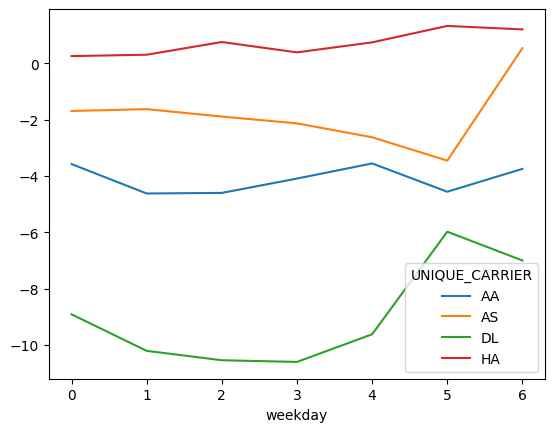

In [95]:
df13_pt.T.plot()